In [30]:
import pandas as pd

df = pd.read_csv("data/nyc_bikeshare.csv")
df = df.sample(n=1_000_000)

In [33]:
df.to_csv("data/nyc_sampled.csv")

In [3]:
nyc = df

In [4]:
from collections import defaultdict

rows = 0
times = defaultdict(list)
for entry in nyc["starttime"]:
    parts = entry.split(" ")
    times["date"].append(parts[0])
    date = parts[0].split("-")
    times["year"].append(date[0])
    times["month"].append(date[1])
    times["day"].append(date[2])
    times["time_of_day"].append(parts[1][:2])
    rows += 1
    if (rows % 100000 == 0):
        print(f"processed {rows} rows")
times_df = pd.DataFrame(times)

processed 100000 rows
processed 200000 rows
processed 300000 rows
processed 400000 rows
processed 500000 rows
processed 600000 rows
processed 700000 rows
processed 800000 rows
processed 900000 rows
processed 1000000 rows


In [5]:
nyc = nyc.join(times_df)

In [7]:
w = pd.read_csv("data/nyc_daily_weather.csv")

from datetime import datetime
def date_to_days(date):
    date = datetime.strptime(date, "%m/%d/%y %H:%M")
    return date.strftime("%m-%d-%y")
  #return "-".join(date.split(" ")[0].split("/"))

w["date"] = w["DATE"].apply(date_to_days)

In [8]:
w.head()

,DATE,DailyAverageDryBulbTemperature,DailySnowDepth,DailySustainedWindSpeed,date
0,1/1/13 23:59,33.0,0.0,15.0,01-01-13
1,1/2/13 23:59,28.0,0.0,15.0,01-02-13
2,1/3/13 23:59,28.0,0.0,13.0,01-03-13
3,1/4/13 23:59,34.0,0.0,18.0,01-04-13
4,1/5/13 23:59,37.0,0.0,17.0,01-05-13


In [9]:
nyc.head()

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender,date,year,month,day,time_of_day
9394713,7258,08-04-16 11:02:50,08-04-16 13:03:49,315.0,508.0,16919,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN
20994788,1081,11-14-18 21:19:04,11-14-18 21:37:05,523.0,3458.0,32151,0.0,1968.0,2,NaN,NaN,NaN,NaN,NaN
3495516,778,09-21-14 19:17:15,09-21-14 19:30:13,496.0,293.0,15869,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN
23087655,649,05-09-19 06:50:05,05-09-19 07:00:54,3350.0,3510.0,35592,1.0,1977.0,1,NaN,NaN,NaN,NaN,NaN
14663157,571,09-12-17 07:43:09,09-12-17 07:52:40,492.0,3235.0,28251,1.0,1981.0,1,NaN,NaN,NaN,NaN,NaN


In [10]:
trips_per_day = nyc.groupby("date")["tripduration"].count()

In [11]:
trips_per_day = pd.DataFrame(trips_per_day)

In [12]:
w = w.join(trips_per_day, on="date")

In [13]:
w.head()

,DATE,DailyAverageDryBulbTemperature,DailySnowDepth,DailySustainedWindSpeed,date,tripduration
0,1/1/13 23:59,33.0,0.0,15.0,01-01-13,NaN
1,1/2/13 23:59,28.0,0.0,15.0,01-02-13,NaN
2,1/3/13 23:59,28.0,0.0,13.0,01-03-13,NaN
3,1/4/13 23:59,34.0,0.0,18.0,01-04-13,NaN
4,1/5/13 23:59,37.0,0.0,17.0,01-05-13,NaN


In [14]:
w = w.dropna()

In [15]:
w.head()

,DATE,DailyAverageDryBulbTemperature,DailySnowDepth,DailySustainedWindSpeed,date,tripduration
151,6/1/13 23:59,82.0,0.0,12.0,06-01-13,2.0
152,6/2/13 23:59,79.0,0.0,15.0,06-02-13,7.0
153,6/3/13 23:59,72.0,0.0,12.0,06-03-13,2.0
154,6/4/13 23:59,66.0,0.0,13.0,06-04-13,2.0
155,6/5/13 23:59,66.0,0.0,10.0,06-05-13,10.0


In [16]:
def daysFrom(date):
    startDate = datetime.strptime('6/1/2013', "%m/%d/%Y")
    endDate = datetime.strptime(date, "%m-%d-%y")
    return (endDate-startDate).days

w["daysFrom"] = w["date"].apply(daysFrom)

In [18]:
w.columns.values

array(['DATE', 'DailyAverageDryBulbTemperature', 'DailySnowDepth',
       'DailySustainedWindSpeed', 'date', 'tripduration', 'daysFrom'],
      dtype=object)

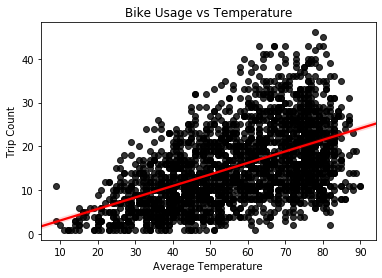

In [27]:
import seaborn as sns

fig = sns.regplot(w["DailyAverageDryBulbTemperature"], w["tripduration"], scatter_kws={"color": "black"}, line_kws={"color": "red"})
fig.set_title("Bike Usage vs Temperature")
fig.set_ylabel("Trip Count")
fig.set_xlabel("Average Temperature")
out = fig.get_figure()
out.savefig("temp_usage.png")

In [29]:
import numpy as np

np.corrcoef(w["DailyAverageDryBulbTemperature"], w["tripduration"])

array([[1.        , 0.51716683],
       [0.51716683, 1.        ]])

In [ ]:
df.corr